In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [2]:
fm = tf.keras.datasets.fashion_mnist
# loading dataset return four numpy arrays
(train_images, train_labels), (test_images, test_labels) = fm.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

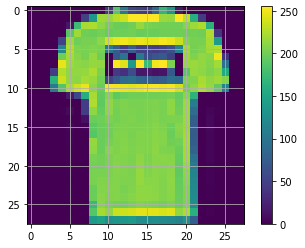

In [5]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid()
plt.show()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# Scale these values to a range of 0 to 1, divide values by 255
train_images = train_images /225.0
test_images = test_images / 225.0


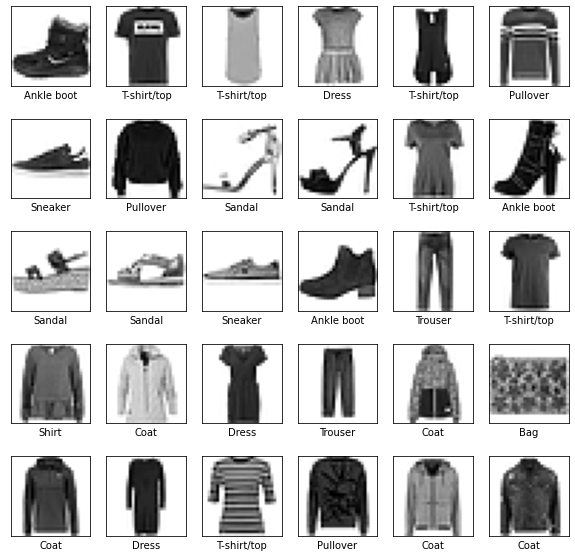

In [8]:
plt.figure(figsize = (10,10))
for i in range(30):
    plt.subplot(5, 6, i+1) # 5 rows, 6 columns
    plt.xticks([]) # hide x and y axis
    plt.yticks([])
    plt.grid(True) 
    plt.imshow(train_images[i],cmap = plt.cm.binary) # display data as an image, cmap defines color
    plt.xlabel(class_names[train_labels[i]]) # label class name to each image x axis
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # transforms the format of the images from a two-dimensional array to a one-dimentional array
    tf.keras.layers.Dense(128, activation = 'relu'), # the first dense layer has 128 nodes, the  second layer returns a logits array with length of 10, each node contains a score that indicates the current image belongs to one of the 10 classes
    tf.keras.layers.Dense(10)
])

In [10]:
# compile the model
# in three parameters: loss function, optimizer, and metrics
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [11]:
# start training
model.fit(train_images, train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4964 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3712 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3334 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3091 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2933 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2774 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2660 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2536 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)
#  An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

313/313 - 0s - loss: 0.3336 - accuracy: 0.8825 - 344ms/epoch - 1ms/step

Test accuracy: 0.8824999928474426


In [13]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 660us/step


In [14]:
predictions[1]
# a prediction is an array of 10 numbers represent the model's confidence that the image corresponds to each of the 10 different clothing

array([3.8554877e-05, 1.2203649e-14, 9.9909949e-01, 4.6918364e-10,
       7.0494105e-04, 1.4196100e-13, 1.5695018e-04, 2.0535538e-14,
       1.0936132e-10, 8.2047143e-15], dtype=float32)

In [15]:
test_labels[1]

2

In [16]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array) # select highest value in matrix
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

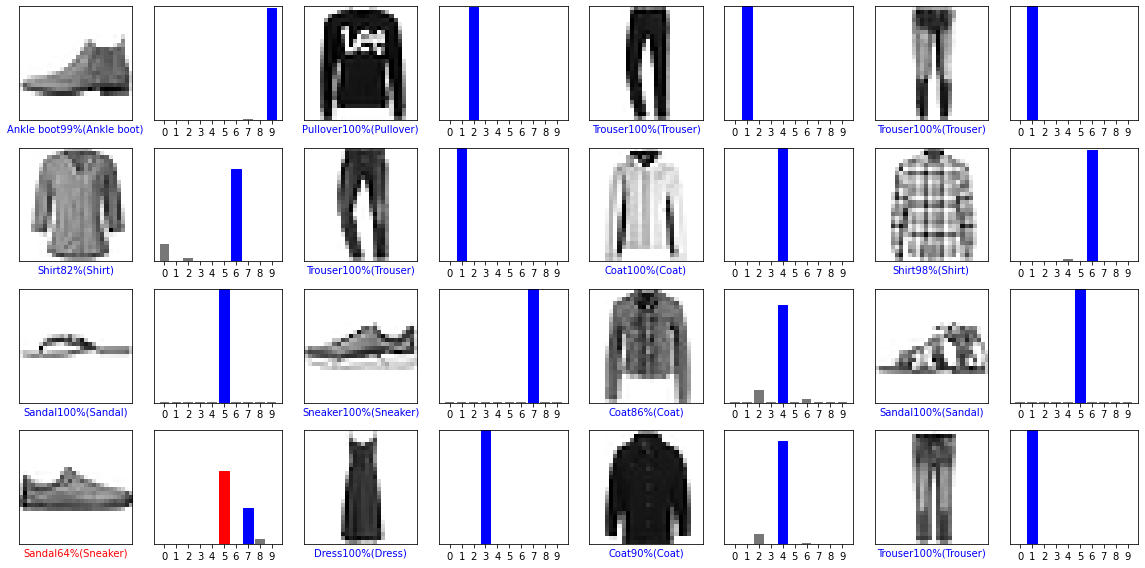

In [17]:
# plot several images and predicted labels
num_rows = 4
num_cols = 4
num_images = 16
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions[i], test_labels, test_images)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()